# **Exploratory Data Analysis(EDA)**

## Objectives

* Write your notebook objective here, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write down which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\All\\Documents\\Code\\Capstone-E-Commerce-Analysis\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\All\\Documents\\Code\\Capstone-E-Commerce-Analysis'

# Section 1

Section 1 content

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [5]:
df = pd.read_csv("dataset/sales.csv")

In [6]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [7]:
df["Revenue"] = df["Price"] * df["Quantity"]
df['InvoiceDate_Year'] = df['InvoiceDate'].dt.year
df['InvoiceDate_Month'] = df['InvoiceDate'].dt.month
df['InvoiceDate_Day'] = df['InvoiceDate'].dt.day

In [8]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,InvoiceDate_Year,InvoiceDate_Month,InvoiceDate_Day
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4,2009,12,1
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,2009,12,1
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,2009,12,1
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8,2009,12,1
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0,2009,12,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824364 entries, 0 to 824363
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Invoice            824364 non-null  object        
 1   StockCode          824364 non-null  object        
 2   Description        824364 non-null  object        
 3   Quantity           824364 non-null  int64         
 4   InvoiceDate        824364 non-null  datetime64[ns]
 5   Price              824364 non-null  float64       
 6   Customer ID        824364 non-null  int64         
 7   Country            824364 non-null  object        
 8   Revenue            824364 non-null  float64       
 9   InvoiceDate_Year   824364 non-null  int32         
 10  InvoiceDate_Month  824364 non-null  int32         
 11  InvoiceDate_Day    824364 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(2), object(4)
memory usage: 66.0+ MB


In [10]:
country_transactions = df.groupby('Country')['Invoice'].nunique()
country_transactions = country_transactions.sort_values(ascending=False)
country_percent = country_transactions / country_transactions.sum() * 100

country_percent

Country
United Kingdom          90.259827
Germany                  2.440057
France                   1.644532
EIRE                     1.620020
Netherlands              0.557091
Spain                    0.418932
Belgium                  0.407790
Sweden                   0.285230
Portugal                 0.271860
Switzerland              0.267404
Australia                0.260718
Italy                    0.205009
Channel Islands          0.176041
Finland                  0.151529
Japan                    0.124788
Denmark                  0.118103
Norway                   0.118103
Austria                  0.113646
Cyprus                   0.100276
Poland                   0.084678
USA                      0.055709
Greece                   0.046796
Unspecified              0.042339
Malta                    0.035654
United Arab Emirates     0.031197
Singapore                0.031197
Canada                   0.017827
Israel                   0.017827
Iceland                  0.017827
Lithua

This tells us that majority of the customers come from the United Kingdom, which makes sense as the company is based and registered in the same country.

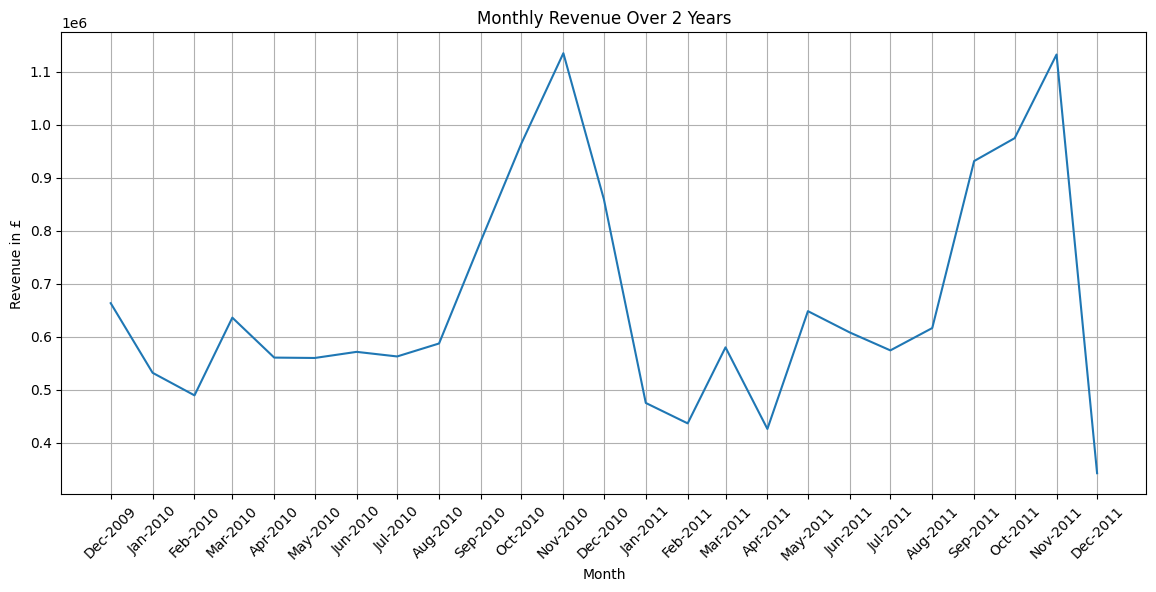

In [11]:
monthly_revenue = df.groupby(df['InvoiceDate'].dt.to_period('M'))['Revenue'].sum()

monthly_revenue.index = monthly_revenue.index.to_timestamp()

month_labels = monthly_revenue.index.strftime('%b-%Y') 

plt.figure(figsize=(14,6))
plt.plot(monthly_revenue.index, monthly_revenue.values)
plt.title('Monthly Revenue Over 2 Years')
plt.xlabel('Month')
plt.ylabel('Revenue in £')
plt.grid(True)

# Set x-axis labels
plt.xticks(ticks=monthly_revenue.index, labels=month_labels, rotation=45)

plt.show()

In [12]:
for row in sorted(df["Price"].dropna().unique()):
    print(row)

0.0
0.001
0.01
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.24
0.25
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35
0.36
0.37
0.38
0.39
0.4
0.41
0.42
0.44
0.45
0.48
0.49
0.5
0.52
0.53
0.55
0.56
0.58
0.59
0.6
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.69
0.7
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.82
0.83
0.84
0.85
0.86
0.87
0.88
0.89
0.9
0.91
0.92
0.94
0.95
0.98
1.0
1.01
1.02
1.04
1.05
1.06
1.08
1.1
1.11
1.12
1.15
1.17
1.18
1.19
1.2
1.23
1.24
1.25
1.27
1.3
1.31
1.32
1.33
1.36
1.38
1.4
1.42
1.43
1.45
1.46
1.47
1.48
1.49
1.5
1.51
1.52
1.53
1.55
1.57
1.58
1.59
1.6
1.63
1.64
1.65
1.66
1.67
1.68
1.69
1.7
1.71
1.72
1.74
1.75
1.76
1.77
1.79
1.8
1.85
1.86
1.87
1.88
1.9
1.92
1.93
1.95
1.96
1.97
1.98
2.0
2.02
2.04
2.08
2.1
2.12
2.14
2.15
2.16
2.17
2.2
2.21
2.22
2.25
2.26
2.29
2.3
2.31
2.32
2.33
2.35
2.36
2.39
2.4
2.41
2.42
2.46
2.47
2.48
2.49
2.5
2.54
2.55
2.56
2.6
2.62
2.65
2.66
2.67
2.69
2.7
2.75
2.8
2.84
2.85
2.88
2.89
2.9
2.92
2.95
2.96
2.98

---

# Numerical Columns

Section 2 content

In [14]:
numeric_cols = [
    "Quantity",
    "Price",
    "Revenue",
    "InvoiceDate_Year",
    "InvoiceDate_Month",
    "InvoiceDate_Day"
]

numeric_columns = df[numeric_cols]

In [16]:
corr_matrix = numeric_columns.corr()
corr_matrix

,Quantity,Price,Revenue,InvoiceDate_Year,InvoiceDate_Month,InvoiceDate_Day
Quantity,1.000000,-0.001917,0.852402,-0.001164,-0.005219,-0.001132
Price,-0.001917,1.000000,-0.150553,-0.001984,-0.004436,0.000796
Revenue,0.852402,-0.150553,1.000000,0.000345,-0.001822,-0.001354
InvoiceDate_Year,-0.001164,-0.001984,0.000345,1.000000,-0.137292,0.064803
InvoiceDate_Month,-0.005219,-0.004436,-0.001822,-0.137292,1.000000,-0.141061
InvoiceDate_Day,-0.001132,0.000796,-0.001354,0.064803,-0.141061,1.000000


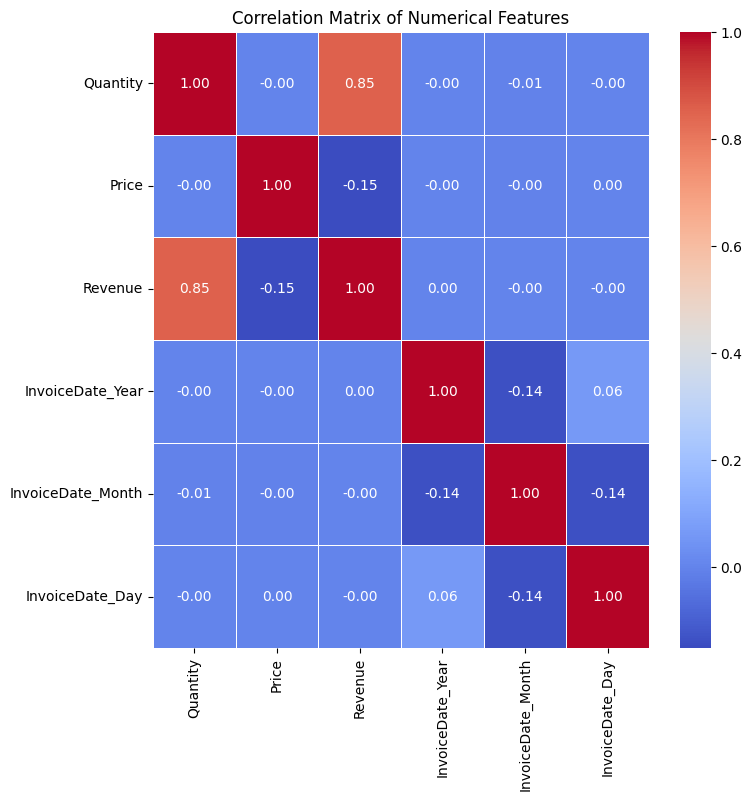

In [17]:
plt.figure(figsize=(8, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

### Findings
- Strong Positive correlation between Revenue and Quantity: Quantity of an item has more impact on the Revenue than the price of an item
- Weak Negative correlation between Revenue and Price: Higher priced items may result in lower Revenue per transaction
- No Correlation between Price and Quantity: Quantity of items purchased are not dictated by the price of the items.

---

# Categorical

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [13]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)


IndentationError: expected an indented block after 'try' statement on line 2 (553063055.py, line 5)